In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import dask.dataframe as dd
import statsmodels.api as sm
from pathlib import Path
import yaml

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load data and cleaning
data = pd.read_csv("/Users/peter/Public/4th year Senior/Fall Semester/ECO482            Machine Learning Applications in Macroeconomics/Project/Counties Health Data 2023 Final.csv")
drop_col = ['State','County']
data = data.drop(columns= drop_col)
data['Presence of Water Violation'] = data['Presence of Water Violation'].map({'Yes':1, 'No':0})
data['Median Household Income'] = data['Median Household Income']/1000

data = data[['% Unemployed',
    '% Completed High School', 'Average Grade Performance', 'Median Household Income','Gender Pay Gap', '% Children in Single-Parent Households','Social Association Rate',
     '% Household Income Required for Child Care Expenses','Segregation Index',
      'Life Expectancy','Age-Adjusted Death Rate','% Adults with Diabetes','% Frequent Physical Distress','% Frequent Mental Distress','% Fair or Poor Health',
       '% Limited Access to Healthy Foods','% Insufficient Sleep','% Adults Reporting Currently Smoking','% Adults with Obesity','% Physically Inactive',
        '% Excessive Drinking',
         '% Uninsured Adults','% Uninsured Children',
          'Traffic Volume','% Homeowners','% Households with Severe Cost Burden','% Long Commute - Drives Alone','% Severe Housing Problems','Presence of Water Violation',
           '% Black', '% American Indian or Alaska Native', '% Asian', '% Hispanic','% Non-Hispanic White','% Native Hawaiian or Other Pacific Islander',
                     '% Female','Population' ]]
data = data.dropna()
data.head()

,% Unemployed,% Completed High School,Average Grade Performance,Median Household Income,Gender Pay Gap,% Children in Single-Parent Households,Social Association Rate,% Household Income Required for Child Care Expenses,Segregation Index,Life Expectancy,...,% Severe Housing Problems,Presence of Water Violation,% Black,% American Indian or Alaska Native,% Asian,% Hispanic,% Non-Hispanic White,% Native Hawaiian or Other Pacific Islander,% Female,Population
1,2.8,90.0,2.9,66.444,0.68,27.0,12.6,20.0,0.05,76.6,...,14.0,0.0,20.7,0.5,1.2,3.3,72.5,0.1,51.4,59095.0
2,3.0,91.0,3.0,65.658,0.74,19.0,9.6,21.0,0.09,77.7,...,12.0,1.0,8.4,0.8,1.1,4.8,83.1,0.1,51.3,239294.0
3,5.7,76.0,2.0,38.649,0.74,54.0,9.4,28.0,0.03,72.9,...,16.0,1.0,47.4,0.7,0.5,5.0,45.3,0.2,46.7,24964.0
4,3.5,81.0,2.6,48.454,0.82,29.0,9.0,26.0,0.09,73.6,...,11.0,0.0,21.3,0.5,0.3,3.1,73.6,0.1,46.0,22477.0
5,2.4,84.0,2.8,56.894,0.86,22.0,6.7,24.0,0.11,74.2,...,10.0,0.0,1.6,0.7,0.4,9.9,86.3,0.1,50.2,59041.0


In [3]:
#1. Setup
np.random.seed(10)
target = '% Unemployed'
features_name = data.drop(target, axis = 1).columns

X = data.drop(target, axis = 1).astype(float).values
y = data[target].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
#Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear Regression:')
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

feature_importance = pd.DataFrame({
    'Feature': features_name,
    'Coefficient': model.coef_
})


feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)


print("Linear Regression Feature Importance:")
print(feature_importance[['Feature', 'Coefficient']])

Linear Regression:
Mean Squared Error: 1.204072087196714
R-squared: 0.4995900418576654
Linear Regression Feature Importance:
                                              Feature  Coefficient
32                               % Non-Hispanic White    -1.502539
13                              % Fair or Poor Health     0.993766
18                              % Physically Inactive    -0.865630
28                                            % Black    -0.759650
16               % Adults Reporting Currently Smoking     0.531058
29                 % American Indian or Alaska Native    -0.525505
20                                 % Uninsured Adults    -0.504588
26                          % Severe Housing Problems     0.391486
23                                       % Homeowners     0.383908
11                       % Frequent Physical Distress    -0.275150
10                             % Adults with Diabetes    -0.266845
6   % Household Income Required for Child Care Exp...     0.241017
31  

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


decision_tree_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, ccp_alpha=0.01, random_state=1)


decision_tree_model.fit(X_train_scaled, y_train)


y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree after pruning:")
print(f"Mean Squared Error: {mse_decision_tree}")
print(f"R-squared: {r2_decision_tree}")


Decision Tree after pruning:
Mean Squared Error: 1.816945654258882
R-squared: 0.24488100964835235


In [6]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1)

random_forest_model.fit(X_train_scaled, y_train)


y_pred_random_forest = random_forest_model.predict(X_test_scaled)


mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest:")
print(f"Mean Squared Error: {mse_random_forest}")
print(f"R-squared: {r2_random_forest}")

importances = random_forest_model.feature_importances_


feature_importance_dict = {feature: importance for feature, importance in zip(features_name, importances)}

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Random Forest:
Mean Squared Error: 1.0072093436213991
R-squared: 0.5814058054816371
% Non-Hispanic White: 0.19338414585444186
% Household Income Required for Child Care Expenses: 0.11892743751946605
% Hispanic: 0.05604792908545185
% Uninsured Adults: 0.03646004003197948
Average Grade Performance: 0.033743293789409906
% Severe Housing Problems: 0.03337513415469685
% Excessive Drinking: 0.03197741178262218
% Long Commute - Drives Alone: 0.031029004153388974
% Insufficient Sleep: 0.029998386075929837
Median Household Income: 0.028508354029533195
Population: 0.02654465921516947
% Completed High School: 0.025205883496665995
Gender Pay Gap: 0.02283631284981369
% Frequent Mental Distress: 0.02241575178064635
% Homeowners: 0.02185796441278824
Social Association Rate: 0.021287205111127992
Segregation Index: 0.02124478384212486
% American Indian or Alaska Native: 0.01978796610167488
Age-Adjusted Death Rate: 0.019634992927739885
% Children in Single-Parent Households: 0.01882035440652445
% Black:

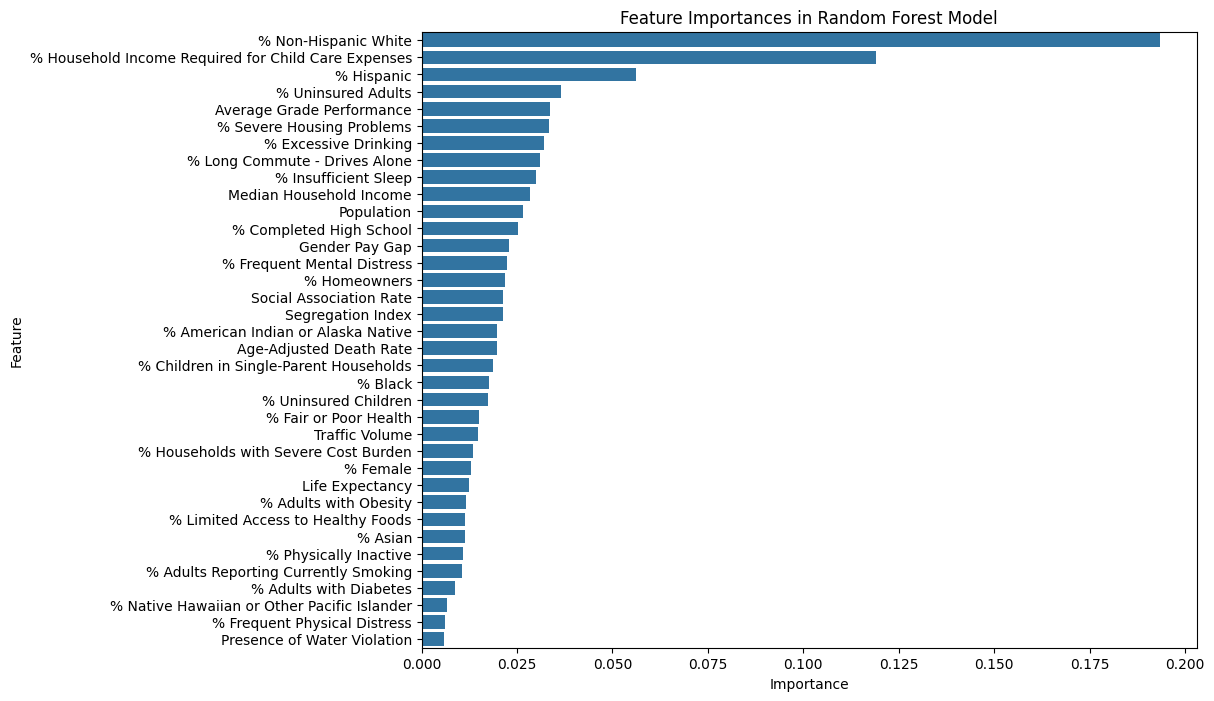

In [7]:
# Convert feature importances into a DataFrame for easier plotting
feature_importances_df = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')

# Show the plot
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


rf = RandomForestRegressor(random_state=1)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)


best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test_scaled)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
217 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packag

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.9946500704065903
R-squared: 0.5866254143825897


In [9]:
# cv = 2


linear_reg_model = LinearRegression()
linear_reg_cv_scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=2)
linear_reg_cv_mse = -linear_reg_cv_scores.mean()

print("Linear Regression Cross-Validation MSE:", linear_reg_cv_mse)


decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=2)
decision_tree_cv_mse = -decision_tree_cv_scores.mean()

print("Decision Tree Cross-Validation MSE:", decision_tree_cv_mse)

random_forest_model = RandomForestRegressor(random_state=1)
random_forest_cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=2)
random_forest_cv_mse = -random_forest_cv_scores.mean()

print("Random Forest Cross-Validation MSE:", random_forest_cv_mse)


Linear Regression Cross-Validation MSE: 1.3308463284996561
Decision Tree Cross-Validation MSE: 2.999531410916581
Random Forest Cross-Validation MSE: 1.321225422760041


In [10]:
# cv = 5


linear_reg_model = LinearRegression()
linear_reg_cv_scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
linear_reg_cv_mse = -linear_reg_cv_scores.mean()

print("Linear Regression Cross-Validation MSE:", linear_reg_cv_mse)


decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
decision_tree_cv_mse = -decision_tree_cv_scores.mean()

print("Decision Tree Cross-Validation MSE:", decision_tree_cv_mse)

random_forest_model = RandomForestRegressor(random_state=1)
random_forest_cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
random_forest_cv_mse = -random_forest_cv_scores.mean()

print("Random Forest Cross-Validation MSE:", random_forest_cv_mse)

Linear Regression Cross-Validation MSE: 1.324051257114149
Decision Tree Cross-Validation MSE: 2.446021347361726
Random Forest Cross-Validation MSE: 1.2539238164855695


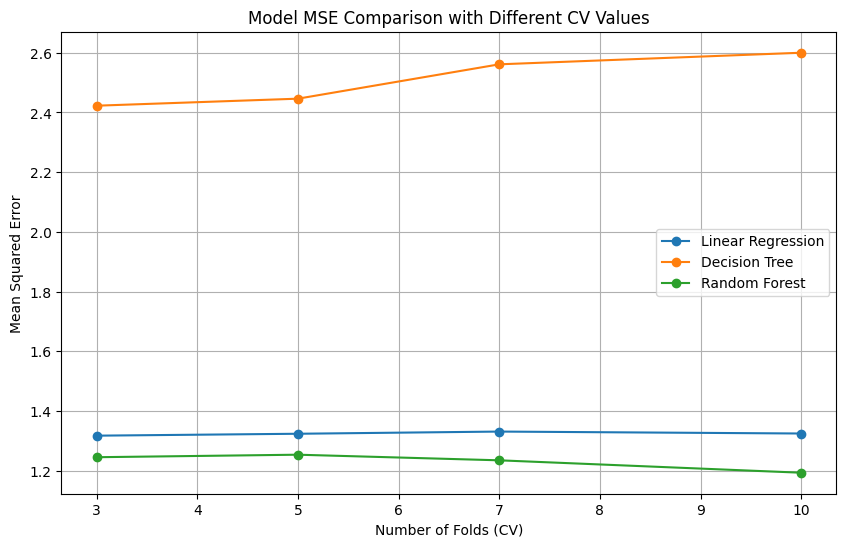

In [11]:
# Range of CV values
cv_values = [3, 5, 7, 10]


def calculate_mse(model, X, y, cv):
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    return -cv_scores.mean()


linear_reg_mse = [calculate_mse(linear_reg_model, X_train_scaled, y_train, cv) for cv in cv_values]
decision_tree_mse = [calculate_mse(decision_tree_model, X_train_scaled, y_train, cv) for cv in cv_values]
random_forest_mse = [calculate_mse(random_forest_model, X_train_scaled, y_train, cv) for cv in cv_values]


plt.figure(figsize=(10, 6))
plt.plot(cv_values, linear_reg_mse, marker='o', label='Linear Regression')
plt.plot(cv_values, decision_tree_mse, marker='o', label='Decision Tree')
plt.plot(cv_values, random_forest_mse, marker='o', label='Random Forest')

plt.title('Model MSE Comparison with Different CV Values')
plt.xlabel('Number of Folds (CV)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
data2 = data[data['% Non-Hispanic White'] > 80]
data2.head()

,% Unemployed,% Completed High School,Average Grade Performance,Median Household Income,Gender Pay Gap,% Children in Single-Parent Households,Social Association Rate,% Household Income Required for Child Care Expenses,Segregation Index,Life Expectancy,...,% Severe Housing Problems,Presence of Water Violation,% Black,% American Indian or Alaska Native,% Asian,% Hispanic,% Non-Hispanic White,% Native Hawaiian or Other Pacific Islander,% Female,Population
2,3.0,91.0,3.0,65.658,0.74,19.0,9.6,21.0,0.09,77.7,...,12.0,1.0,8.4,0.8,1.1,4.8,83.1,0.1,51.3,239294.0
5,2.4,84.0,2.8,56.894,0.86,22.0,6.7,24.0,0.11,74.2,...,10.0,0.0,1.6,0.7,0.4,9.9,86.3,0.1,50.2,59041.0
10,2.5,80.0,2.6,46.365,0.86,25.0,8.4,21.0,0.06,74.0,...,9.0,0.0,4.1,0.8,0.5,1.9,91.1,0.0,50.2,24996.0
15,2.6,83.0,3.1,49.769,0.74,21.0,8.0,22.0,0.10,74.3,...,9.0,0.0,2.8,0.5,0.2,2.7,92.4,0.1,50.7,15103.0
20,3.0,85.0,2.7,44.188,0.73,32.0,11.6,31.0,0.09,72.9,...,13.0,0.0,12.5,0.8,0.5,2.1,82.6,0.0,51.5,37524.0


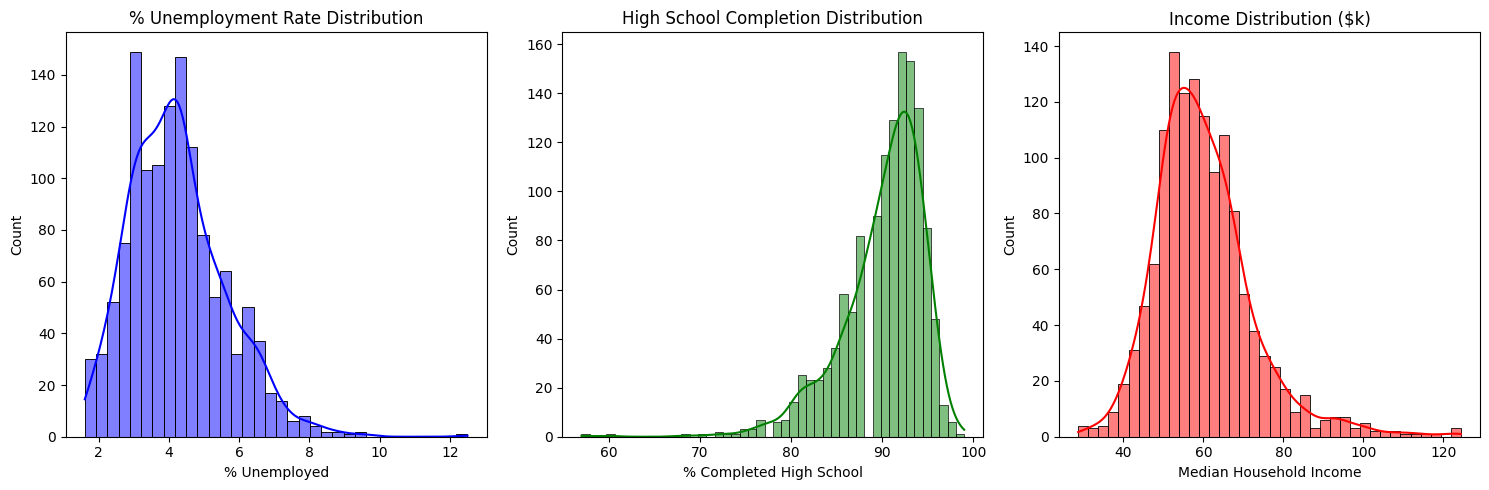

In [13]:
#Descriptive data
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data2['% Unemployed'], kde=True, color='blue')
plt.title('% Unemployment Rate Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data2['% Completed High School'], kde=True, color='green')
plt.title('High School Completion Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data2['Median Household Income'], kde=True, color='red')
plt.title('Income Distribution ($k)')

plt.tight_layout()
plt.show()


In [14]:

data_des = data2[['% Unemployed', '% Completed High School','Median Household Income']]
descriptive_stats = data_des.describe()

print(descriptive_stats)


       % Unemployed  % Completed High School  Median Household Income
count   1305.000000              1305.000000              1305.000000
mean       4.232184                90.077395                60.078212
std        1.367527                 4.565910                12.377854
min        1.600000                57.000000                28.720000
25%        3.200000                88.000000                51.936000
50%        4.100000                91.000000                58.463000
75%        5.000000                93.000000                65.893000
max       12.500000                99.000000               124.354000


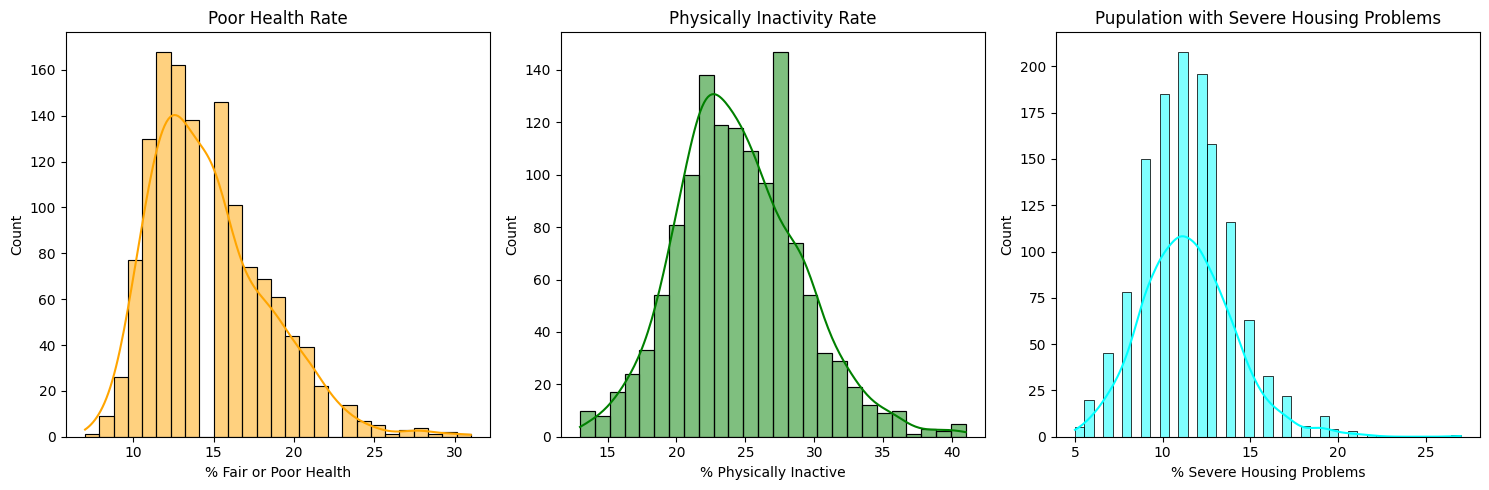

In [15]:
# Creating a histogram for each variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data2['% Fair or Poor Health'], kde=True, color='Orange')
plt.title('Poor Health Rate')

plt.subplot(1, 3, 2)
sns.histplot(data2['% Physically Inactive'], kde=True, color='green')
plt.title('Physically Inactivity Rate')

plt.subplot(1, 3, 3)
sns.histplot(data2['% Severe Housing Problems'], kde=True, color='Cyan')
plt.title('Pupulation with Severe Housing Problems')

plt.tight_layout()
plt.show()

In [16]:
data_des2 = data2[['% Fair or Poor Health', '% Physically Inactive','% Severe Housing Problems']]
descriptive_stats = data_des2.describe()

print(descriptive_stats)

       % Fair or Poor Health  % Physically Inactive  % Severe Housing Problems
count            1305.000000            1305.000000                1305.000000
mean               14.688889              24.514943                  11.462069
std                 3.641075               4.496246                   2.642325
min                 7.000000              13.000000                   5.000000
25%                12.000000              21.000000                  10.000000
50%                14.000000              24.000000                  11.000000
75%                17.000000              27.000000                  13.000000
max                31.000000              41.000000                  27.000000


In [17]:
#1. Setup

np.random.seed(10)
target = '% Unemployed'
features_name = data2.drop(target, axis = 1).columns

X = data2.drop(target, axis = 1).astype(float).values
y = data2[target].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features (optional but can help with model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear Regression:')
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

feature_importance = pd.DataFrame({
    'Feature': features_name,
    'Coefficient': model.coef_
})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Linear Regression Feature Importance:")
print(feature_importance[['Feature', 'Coefficient']])

Linear Regression:
Mean Squared Error: 1.0988938108770399
R-squared: 0.48519130615043105
Linear Regression Feature Importance:
                                              Feature  Coefficient
16               % Adults Reporting Currently Smoking     0.652198
32                               % Non-Hispanic White    -0.564032
18                              % Physically Inactive    -0.503053
10                             % Adults with Diabetes    -0.499611
13                              % Fair or Poor Health     0.330574
6   % Household Income Required for Child Care Exp...     0.294615
20                                 % Uninsured Adults    -0.286339
23                                       % Homeowners     0.283078
31                                         % Hispanic    -0.266289
28                                            % Black    -0.231000
15                               % Insufficient Sleep     0.217273
9                             Age-Adjusted Death Rate     0.201323
29

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


decision_tree_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, ccp_alpha=0.01, random_state=1)

decision_tree_model.fit(X_train_scaled, y_train)


y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)


mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree after pruning:")
print(f"Mean Squared Error: {mse_decision_tree}")
print(f"R-squared: {r2_decision_tree}")


Decision Tree after pruning:
Mean Squared Error: 1.4263724747786066
R-squared: 0.33177442313767214


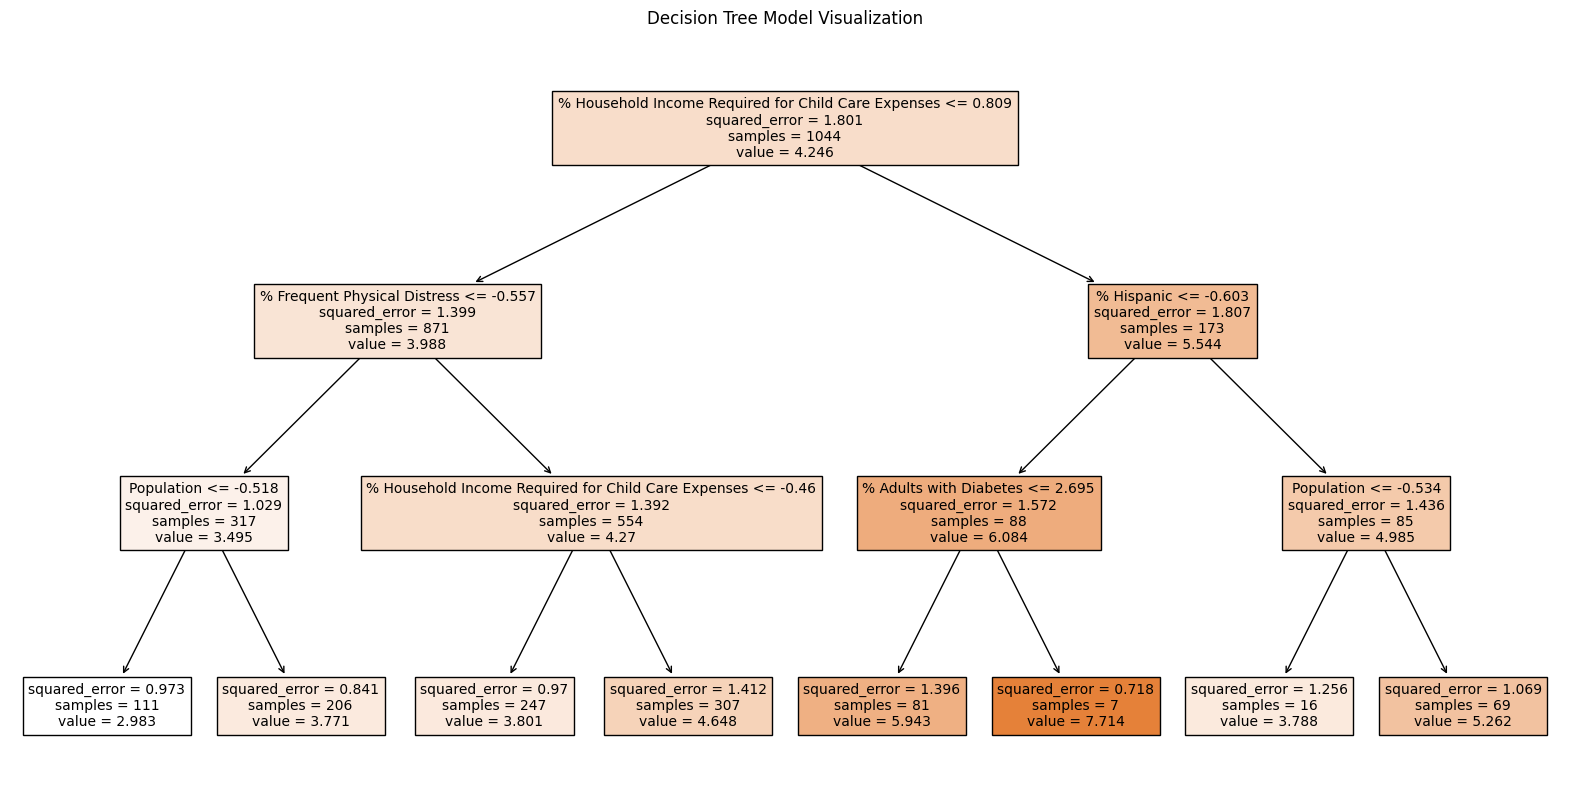

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=features_name, max_depth=3, fontsize=10)
plt.title("Decision Tree Model Visualization")
plt.show()

Random Forest:
Mean Squared Error: 0.894561827586207
R-squared: 0.5809165531110002
% Household Income Required for Child Care Expenses: 0.2573353822470296
% Frequent Mental Distress: 0.05153210951842808
% Excessive Drinking: 0.04721733332671917
Population: 0.04032095957979819
% Hispanic: 0.03475171955614542
% Insufficient Sleep: 0.03457327329312328
% Fair or Poor Health: 0.032933677769234275
% Homeowners: 0.030871341781524442
Median Household Income: 0.029365115861557642
% Uninsured Adults: 0.028509492048573993
% Long Commute - Drives Alone: 0.0271792785282097
Social Association Rate: 0.025826654459421547
Average Grade Performance: 0.025524111104668408
Age-Adjusted Death Rate: 0.024409048181651582
% American Indian or Alaska Native: 0.02272043987305461
% Black: 0.020122132334565102
% Frequent Physical Distress: 0.0190353354611391
% Uninsured Children: 0.01885673701717192
% Children in Single-Parent Households: 0.0182226778782346
% Severe Housing Problems: 0.01797044152315777
Traffic Vo

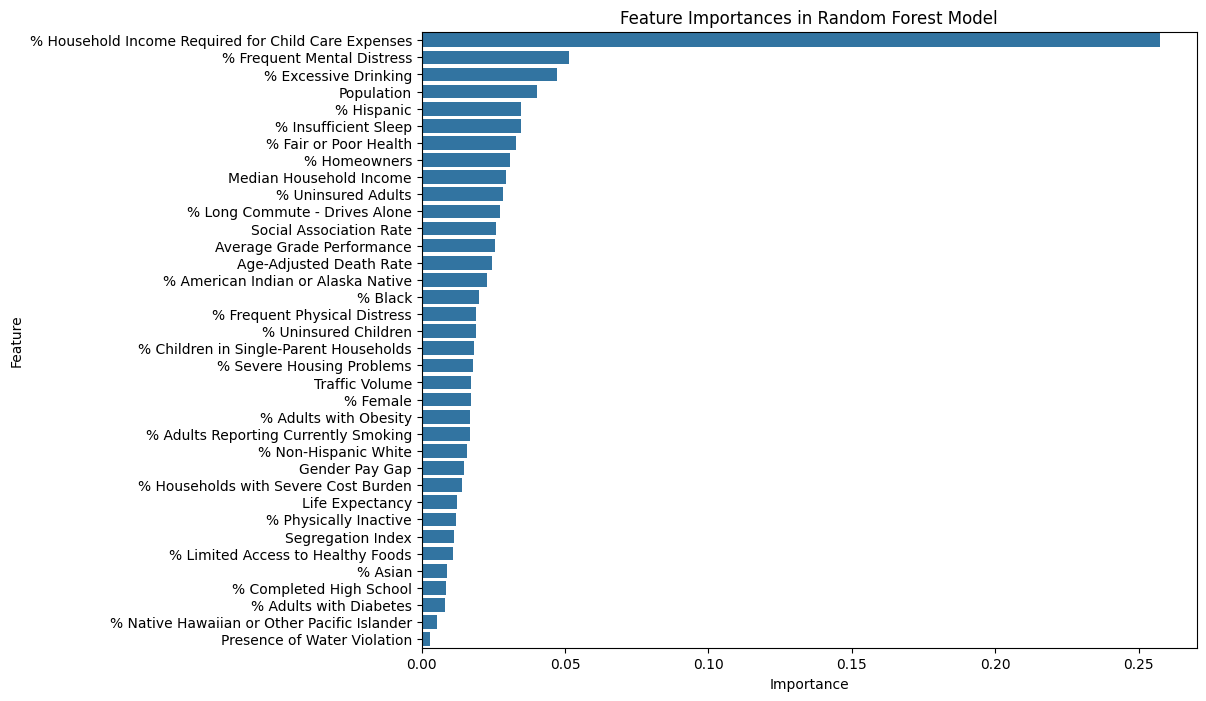

In [21]:
# Create a Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1)

random_forest_model.fit(X_train_scaled, y_train)

y_pred_random_forest = random_forest_model.predict(X_test_scaled)


mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)


print("Random Forest:")
print(f"Mean Squared Error: {mse_random_forest}")
print(f"R-squared: {r2_random_forest}")

importances = random_forest_model.feature_importances_

feature_importance_dict = {feature: importance for feature, importance in zip(features_name, importances)}

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

feature_importances_df = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])

plt.figure(figsize=(10, 8))

sns.barplot(x='Importance', y='Feature', data=feature_importances_df)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')

plt.show()


In [22]:
# cv = 5


linear_reg_model = LinearRegression()
linear_reg_cv_scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
linear_reg_cv_mse = -linear_reg_cv_scores.mean()

print("Linear Regression Cross-Validation MSE:", linear_reg_cv_mse)


decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
decision_tree_cv_mse = -decision_tree_cv_scores.mean()

print("Decision Tree Cross-Validation MSE:", decision_tree_cv_mse)


random_forest_model = RandomForestRegressor(random_state=1)
random_forest_cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
random_forest_cv_mse = -random_forest_cv_scores.mean()

print("Random Forest Cross-Validation MSE:", random_forest_cv_mse)

Linear Regression Cross-Validation MSE: 0.9321472476237534
Decision Tree Cross-Validation MSE: 1.6400424181082076
Random Forest Cross-Validation MSE: 0.8041739919534413


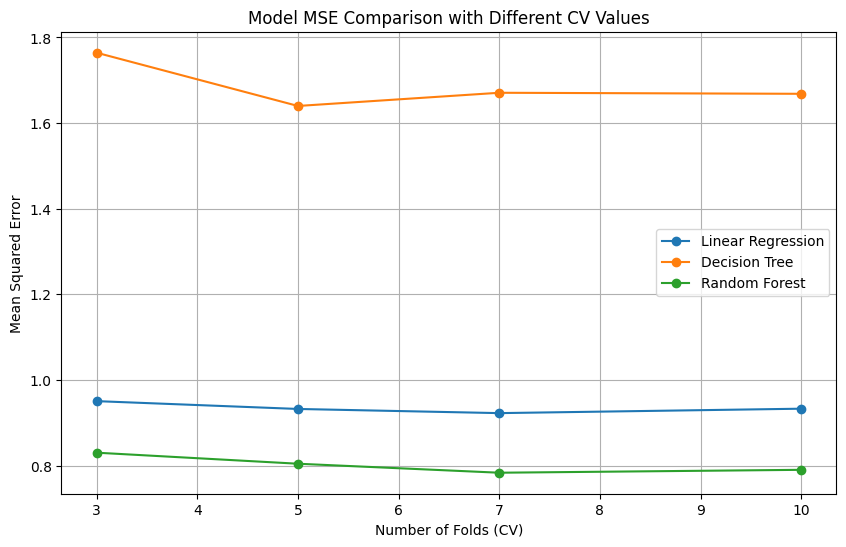

In [23]:
# Range of CV values
cv_values = [3, 5, 7, 10]

def calculate_mse(model, X, y, cv):
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    return -cv_scores.mean()

linear_reg_mse = [calculate_mse(linear_reg_model, X_train_scaled, y_train, cv) for cv in cv_values]
decision_tree_mse = [calculate_mse(decision_tree_model, X_train_scaled, y_train, cv) for cv in cv_values]
random_forest_mse = [calculate_mse(random_forest_model, X_train_scaled, y_train, cv) for cv in cv_values]

plt.figure(figsize=(10, 6))
plt.plot(cv_values, linear_reg_mse, marker='o', label='Linear Regression')
plt.plot(cv_values, decision_tree_mse, marker='o', label='Decision Tree')
plt.plot(cv_values, random_forest_mse, marker='o', label='Random Forest')

plt.title('Model MSE Comparison with Different CV Values')
plt.xlabel('Number of Folds (CV)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Compare the Random Forest Performance 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target_variable = '% Unemployed'


X = data.drop(target_variable, axis=1)
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X2 = data2.drop(target_variable, axis=1)
y2 = data2[target_variable]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_original = RandomForestRegressor(n_estimators=100, random_state=1)
model_original.fit(X_train_scaled, y_train)


model_subset = RandomForestRegressor(n_estimators=100, random_state=1)
model_subset.fit(X2_train_scaled, y2_train)

y_pred_original = model_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

y_pred_subset = model_subset.predict(X2_test_scaled)
mse_subset = mean_squared_error(y2_test, y_pred_subset)
r2_subset = r2_score(y2_test, y_pred_subset)

print("Original Data - Random Forest:")
print(f"Mean Squared Error: {mse_original}")
print(f"R-squared: {r2_original}")

print("\nSubset Data - Random Forest:")
print(f"Mean Squared Error: {mse_subset}")
print(f"R-squared: {r2_subset}")


Original Data - Random Forest:
Mean Squared Error: 1.2712507366255141
R-squared: 0.5772704375365137

Subset Data - Random Forest:
Mean Squared Error: 0.7611619616858235
R-squared: 0.6179520933859756


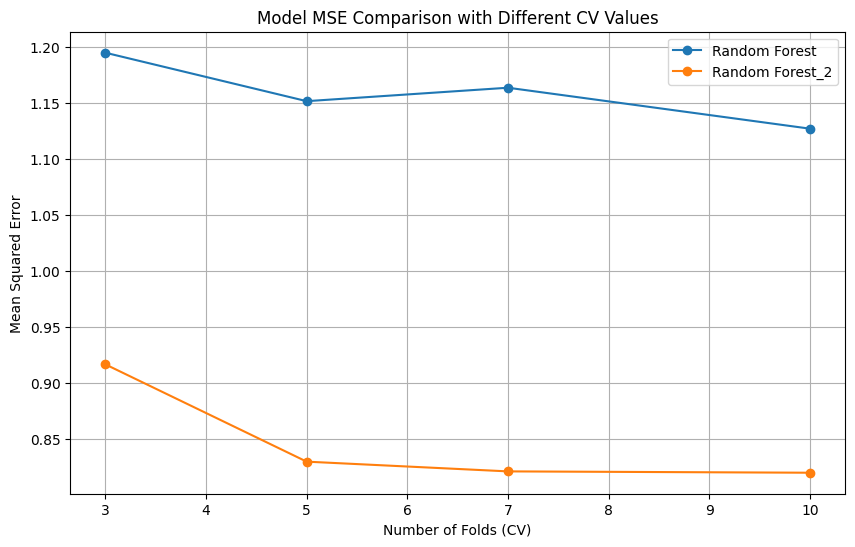

In [26]:
# Range of CV values
cv_values = [3, 5, 7, 10]

def calculate_mse(model, X, y, cv):
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    return -cv_scores.mean()



random_forest_mse = [calculate_mse(random_forest_model, X_train_scaled, y_train, cv) for cv in cv_values]
random_forest_mse_2 = [calculate_mse(random_forest_model, X2_train_scaled, y2_train, cv) for cv in cv_values]


plt.figure(figsize=(10, 6))
plt.plot(cv_values, random_forest_mse, marker='o', label='Random Forest')
plt.plot(cv_values, random_forest_mse_2, marker='o', label='Random Forest_2')

plt.title('Model MSE Comparison with Different CV Values')
plt.xlabel('Number of Folds (CV)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
# To solve this problem, we can use Bayes' theorem.
# Let A be the event "the coin is unfair" and B be the event "tails comes up 5 times".
# We want to find P(A|B), the probability that the coin is unfair given that tails comes up 5 times.

# P(A) is the prior probability of picking the unfair coin, which is 1/2 (since there is an equal chance of picking either coin).
# P(B|A) is the probability of getting 5 tails given that the coin is unfair, which is 1 (since the unfair coin always lands on tails).
# P(B) is the probability of getting 5 tails. This can happen in two ways:
# 1. Picking the unfair coin and getting tails (probability 1/2 * 1 = 1/2).
# 2. Picking the fair coin and getting tails 5 times (probability 1/2 * (1/2)^5 = 1/64).

# Calculating P(A|B) using Bayes' theorem: P(A|B) = [P(B|A) * P(A)] / P(B)

P_A = 1/2  # Probability of picking the unfair coin
P_B_A = 1   # Probability of getting 5 tails with the unfair coin
P_B = 1/2 + 1/64  # Total probability of getting 5 tails with either coin

P_A_B = (P_B_A * P_A) / P_B
P_A_B


0.9696969696969697